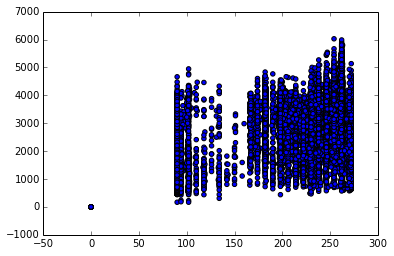

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import style
#style.use("gunplot")
from sklearn.cluster import KMeans
%matplotlib inline
from osgeo import gdal
from sklearn.externals import joblib

class MDimage(object):
    def __init__(self, filepath):
        self.filepath = filepath
        self.ds = gdal.Open(filepath, gdal.GA_ReadOnly)
        self.iminfo = dict()
        self.iminfo['bandnum'] = self.ds.RasterCount
        self.iminfo['cols'] = self.ds.RasterXSize
        self.iminfo['rows'] = self.ds.RasterYSize
        self.iminfo['originX'] = self.ds.GetGeoTransform()[0]
        self.iminfo['originY'] = self.ds.GetGeoTransform()[3]
        self.iminfo['pixelWidth'] = self.ds.GetGeoTransform()[1]
        self.iminfo['pixelHeight'] = self.ds.GetGeoTransform()[5]

class Index(MDimage):
    def __init__(self, filepath):
        self.filepath = filepath
        super(Index, self).__init__(filepath)

    def index2Array(self):
        cols = self.iminfo['cols']
        rows = self.iminfo['rows']
        band = self.ds.GetRasterBand(1)
        array = band.ReadAsArray(0, 0, cols, rows)
        array = array.reshape(cols * rows)
        return array

year=2002   
evi="/home/faizan/Pakistan/EVI/"+str(year)+"/faislabad.%d.kharif_max_evi_value.tif" % (year)
date="/home/faizan/Pakistan/EVI/"+str(year)+"/faislabad.%d.kharif_max_evi.tif" % (year)
limage = Index(evi)
cols = limage.iminfo['cols']
rows = limage.iminfo['rows']
bandnum= limage.iminfo['bandnum']
Y = (limage.index2Array())

limage = Index(date)
X= (limage.index2Array())

plt.scatter (X,Y)
plt.show()



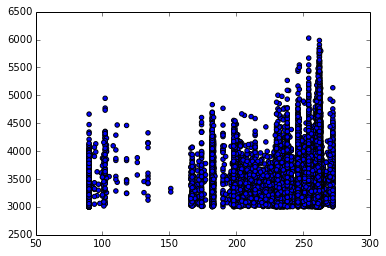

In [14]:
y=[]
x=[]
D=[]
for i in np.where(Y > 3000)[0]:
    y.append(Y[i])
    x.append(X[i])
    D.append([X[i], Y[i]])
plt.scatter (x,y)
plt.show()

[[  179.10384163  3329.400392  ]
 [  252.36822998  4209.3950157 ]]
[1 1 0 ..., 1 1 1]


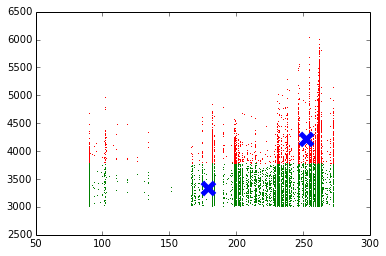

In [15]:
clf= KMeans(n_clusters=2)
clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()
    

In [16]:
from sklearn.cluster import MiniBatchKMeans

[[  252.87189127  4208.53658184]
 [  178.702223    3327.60009311]]
[0 0 1 ..., 0 0 0]


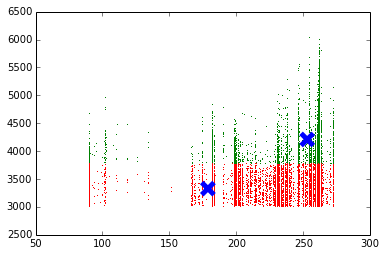

In [17]:
clf= MiniBatchKMeans(n_clusters=2)
clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()
    

In [9]:
from sklearn.cluster import SpectralClustering

In [11]:
clf= SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/manifold/spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [ ]:
clf.predict([120,6000])

In [48]:
centroid

array([[   86.34083787,  3593.1126505 ],
       [   60.48093467,  5844.55068589],
       [   78.74317954,  4338.07958877],
       [   66.50186261,  5021.08096855]])

In [49]:
lables

array([3, 2, 3, ..., 1, 1, 1], dtype=int32)

In [41]:
len(lables)

58922

In [42]:
len(x)

58922